In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')   

In [2]:
# Load data yang sudah disimpan
df = pd.read_csv('mlbb_hero_datasets.csv')
print(f"Data berhasil dimuat: {len(df)} hero")
print(f"Kolom yang tersedia: {list(df.columns)}")

df.head()

Data berhasil dimuat: 130 hero
Kolom yang tersedia: ['hero_id', 'hero_name', 'role', 'lane', 'pick_rate', 'win_rate', 'ban_rate', 'speciality']


,hero_id,hero_name,role,lane,pick_rate,win_rate,ban_rate,speciality
0,109,Aamon,Assassin,Jungle,0.99,54.05,54.10,"Chase, Magic Damage"
1,9,Akai,Tank,Roam,0.49,48.93,0.57,"Guard, Crowd Control"
2,64,Aldous,Fighter,Exp Lane,0.19,49.33,0.12,"Burst, Support"
3,4,Alice,Tank,Exp Lane,1.06,50.75,64.14,"Charge, Regen"
4,28,Alpha,Fighter,Jungle,0.74,48.57,0.18,"Charge, Damage"


In [3]:
df_original = df.copy()
print(f"Data original: {len(df_original)} hero")

features = ['pick_rate', 'win_rate', 'ban_rate']
X = df[features].copy()

# 2. Deteksi dan hapus outliers menggunakan Z-score
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

X_clean = X[filtered_entries]
df_clean = df[filtered_entries].copy()

print(f"Data setelah outlier removal: {len(df_clean)} hero")
print(f"Outliers dihapus: {len(df) - len(df_clean)}")

# 3. Normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_clean)

# Tambahkan data normalized ke dataframe
for i, feature in enumerate(features):
    df_clean[f'{feature}_normalized'] = X_normalized[:, i]

# 4. Simpan data hasil preprocessing
output_file = 'mlbb_preprocessed_data.csv'
df_clean.to_csv(output_file, index=False)
print(f"\nData hasil preprocessing disimpan sebagai: {output_file}")

Data original: 130 hero
Data setelah outlier removal: 123 hero
Outliers dihapus: 7

Data hasil preprocessing disimpan sebagai: mlbb_preprocessed_data.csv



EDA: LINE PLOT


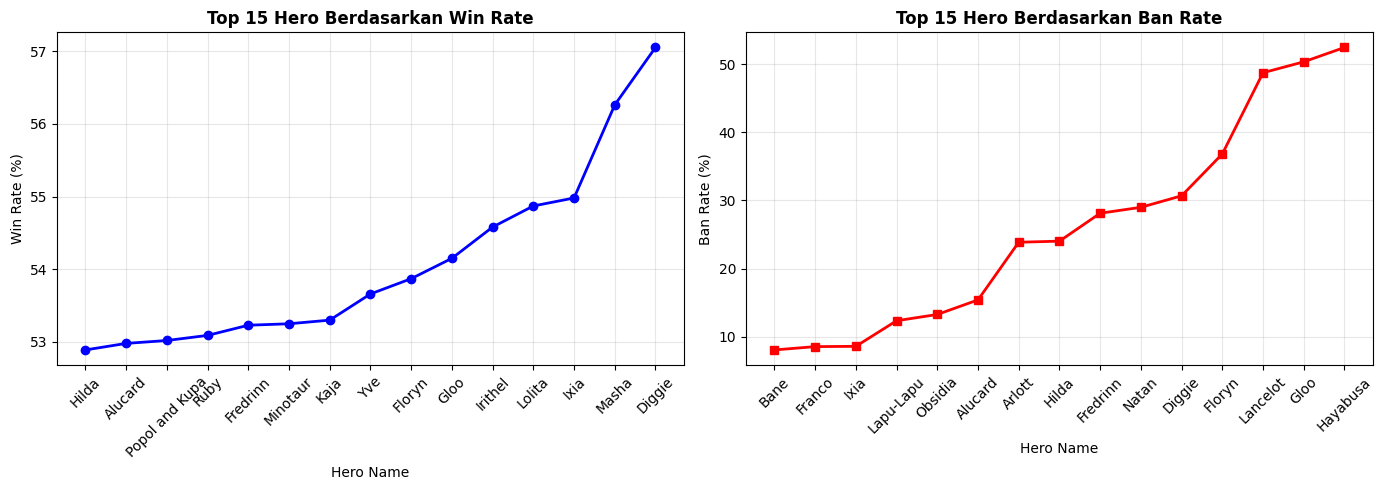


Deskripsi Line Plot:
1. Line Plot Win Rate: Menampilkan 15 hero dengan win rate tertinggi.
   Hero dengan win rate tinggi menunjukkan efektivitas dalam pertandingan.
2. Line Plot Ban Rate: Menampilkan 15 hero dengan ban rate tertinggi.
   Hero dengan ban rate tinggi dianggap terlalu kuat dan sering dilarang.


In [4]:
print("\nEDA: LINE PLOT")
print("=" * 50)

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line Plot 1: Top 15 Hero berdasarkan Win Rate
top_win_rate = df_clean.nlargest(15, 'win_rate').sort_values('win_rate')
axes[0].plot(top_win_rate['hero_name'], top_win_rate['win_rate'], 
             marker='o', linewidth=2, color='blue')
axes[0].set_title('Top 15 Hero Berdasarkan Win Rate', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Hero Name')
axes[0].set_ylabel('Win Rate (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Line Plot 2: Top 15 Hero berdasarkan Ban Rate
top_ban_rate = df_clean.nlargest(15, 'ban_rate').sort_values('ban_rate')
axes[1].plot(top_ban_rate['hero_name'], top_ban_rate['ban_rate'], 
             marker='s', linewidth=2, color='red')
axes[1].set_title('Top 15 Hero Berdasarkan Ban Rate', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Hero Name')
axes[1].set_ylabel('Ban Rate (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDeskripsi Line Plot:")
print("1. Line Plot Win Rate: Menampilkan 15 hero dengan win rate tertinggi.")
print("   Hero dengan win rate tinggi menunjukkan efektivitas dalam pertandingan.")
print("2. Line Plot Ban Rate: Menampilkan 15 hero dengan ban rate tertinggi.")
print("   Hero dengan ban rate tinggi dianggap terlalu kuat dan sering dilarang.")


EDA: BOX PLOT


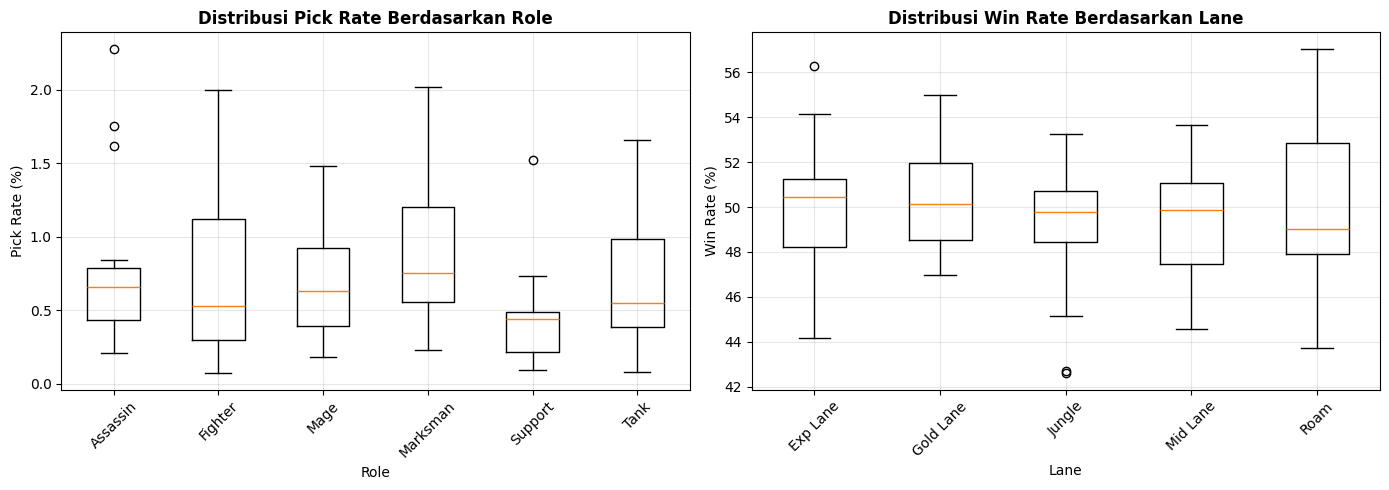


Deskripsi Box Plot:
1. Box Plot Pick Rate per Role: Menunjukkan variasi pick rate antar role.
   Median yang tinggi menunjukkan role yang populer di meta saat ini.
2. Box Plot Win Rate per Lane: Menunjukkan konsistensi win rate di setiap lane.
   Box yang sempit menunjukkan win rate yang konsisten untuk lane tersebut.


In [5]:
print("\nEDA: BOX PLOT")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box Plot 1: Distribusi Pick Rate berdasarkan Role
role_pick_rate = df_clean.groupby('role')['pick_rate'].apply(list).to_dict()

# Filter roles dengan cukup data
filtered_roles = {role: values for role, values in role_pick_rate.items() if len(values) >= 3}

axes[0].boxplot(filtered_roles.values(), labels=filtered_roles.keys())
axes[0].set_title('Distribusi Pick Rate Berdasarkan Role', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Role')
axes[0].set_ylabel('Pick Rate (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Box Plot 2: Distribusi Win Rate berdasarkan Lane
lane_win_rate = df_clean.groupby('lane')['win_rate'].apply(list).to_dict()

# Filter lanes dengan cukup data
filtered_lanes = {lane: values for lane, values in lane_win_rate.items() if len(values) >= 3}

axes[1].boxplot(filtered_lanes.values(), labels=filtered_lanes.keys())
axes[1].set_title('Distribusi Win Rate Berdasarkan Lane', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lane')
axes[1].set_ylabel('Win Rate (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDeskripsi Box Plot:")
print("1. Box Plot Pick Rate per Role: Menunjukkan variasi pick rate antar role.")
print("   Median yang tinggi menunjukkan role yang populer di meta saat ini.")
print("2. Box Plot Win Rate per Lane: Menunjukkan konsistensi win rate di setiap lane.")
print("   Box yang sempit menunjukkan win rate yang konsisten untuk lane tersebut.")


EDA: PIE CHART


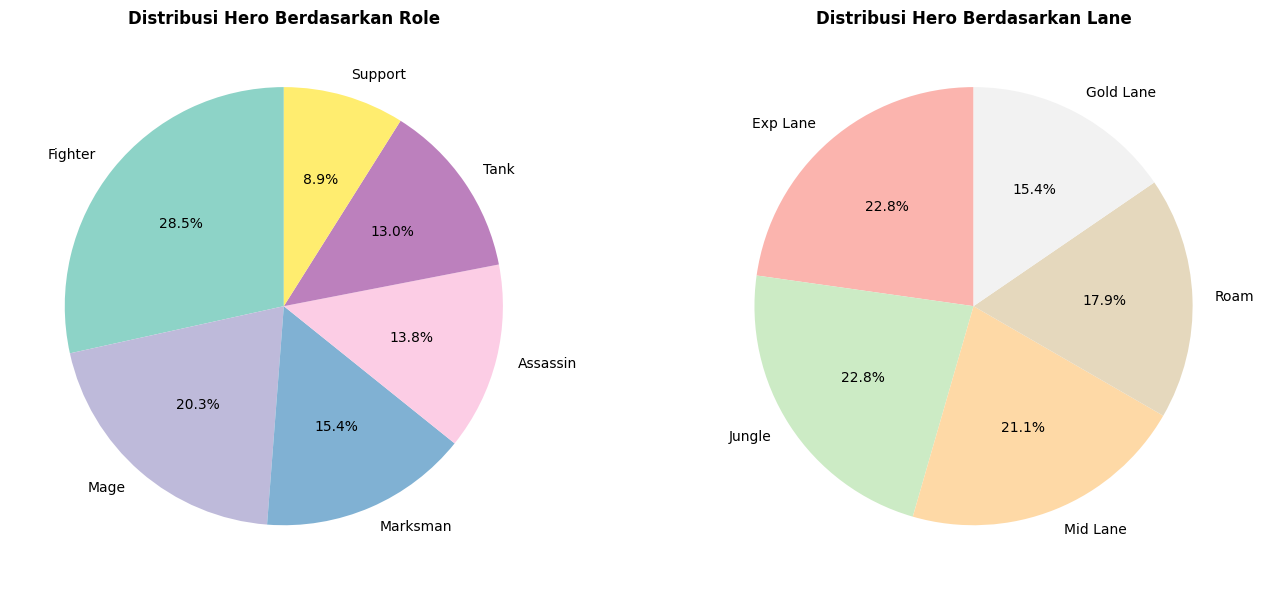


Deskripsi Pie Chart:
1. Pie Chart Role: Menunjukkan persentase hero untuk setiap role.
   Distribusi yang seimbang menunjukkan variasi role yang baik.
2. Pie Chart Lane: Menunjukkan preferensi lane untuk hero-hero.
   Lane tertentu mungkin lebih populer dalam meta saat ini.


In [6]:
print("\nEDA: PIE CHART")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart 1: Distribusi Role
role_counts = df_clean['role'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(role_counts)))

axes[0].pie(role_counts.values, labels=role_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[0].set_title('Distribusi Hero Berdasarkan Role', fontsize=12, fontweight='bold')

# Pie Chart 2: Distribusi Lane
lane_counts = df_clean['lane'].value_counts()
colors2 = plt.cm.Pastel1(np.linspace(0, 1, len(lane_counts)))

axes[1].pie(lane_counts.values, labels=lane_counts.index, autopct='%1.1f%%',
            colors=colors2, startangle=90)
axes[1].set_title('Distribusi Hero Berdasarkan Lane', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nDeskripsi Pie Chart:")
print("1. Pie Chart Role: Menunjukkan persentase hero untuk setiap role.")
print("   Distribusi yang seimbang menunjukkan variasi role yang baik.")
print("2. Pie Chart Lane: Menunjukkan preferensi lane untuk hero-hero.")
print("   Lane tertentu mungkin lebih populer dalam meta saat ini.")


EDA: SCATTER PLOT


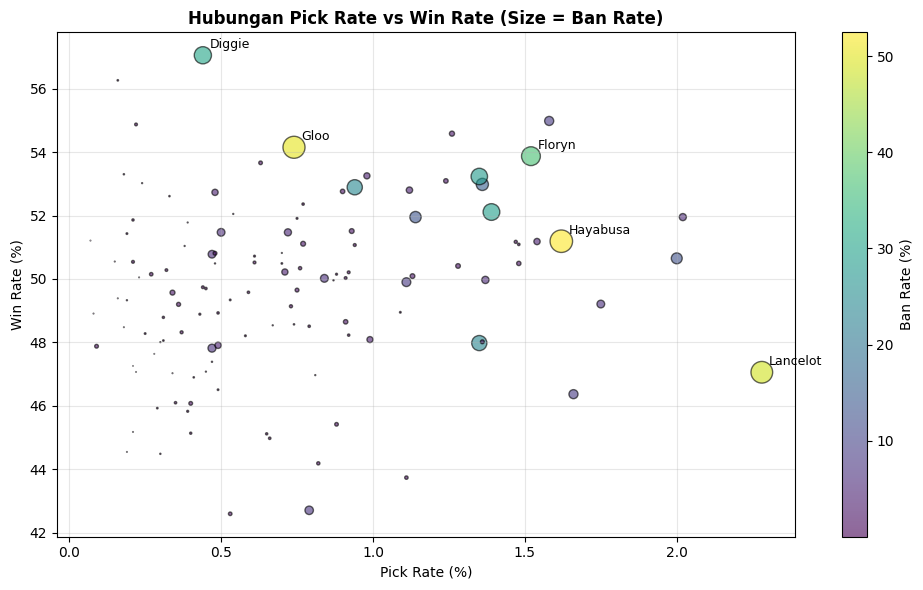


Deskripsi Scatter Plot:
Scatter plot ini menunjukkan hubungan antara Pick Rate dan Win Rate.
Ukuran titik menunjukkan Ban Rate (semakin besar, semakin sering di-ban).
Hero di kanan atas: sering dipilih dan menang tinggi (META hero).
Hero di kanan bawah: sering dipilih tetapi win rate rendah (perlu buff).


In [7]:
print("\nEDA: SCATTER PLOT")
print("=" * 50)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_clean['pick_rate'], df_clean['win_rate'], 
                      c=df_clean['ban_rate'], s=df_clean['ban_rate']*5,
                      alpha=0.6, cmap='viridis', edgecolors='black')

plt.colorbar(scatter, label='Ban Rate (%)')
plt.title('Hubungan Pick Rate vs Win Rate (Size = Ban Rate)', fontsize=12, fontweight='bold')
plt.xlabel('Pick Rate (%)')
plt.ylabel('Win Rate (%)')
plt.grid(True, alpha=0.3)

# Tambahkan beberapa label untuk hero penting
for idx, row in df_clean.nlargest(5, 'ban_rate').iterrows():
    plt.annotate(row['hero_name'], (row['pick_rate'], row['win_rate']),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print("\nDeskripsi Scatter Plot:")
print("Scatter plot ini menunjukkan hubungan antara Pick Rate dan Win Rate.")
print("Ukuran titik menunjukkan Ban Rate (semakin besar, semakin sering di-ban).")
print("Hero di kanan atas: sering dipilih dan menang tinggi (META hero).")
print("Hero di kanan bawah: sering dipilih tetapi win rate rendah (perlu buff).")


EDA: CORRELATION MATRIX


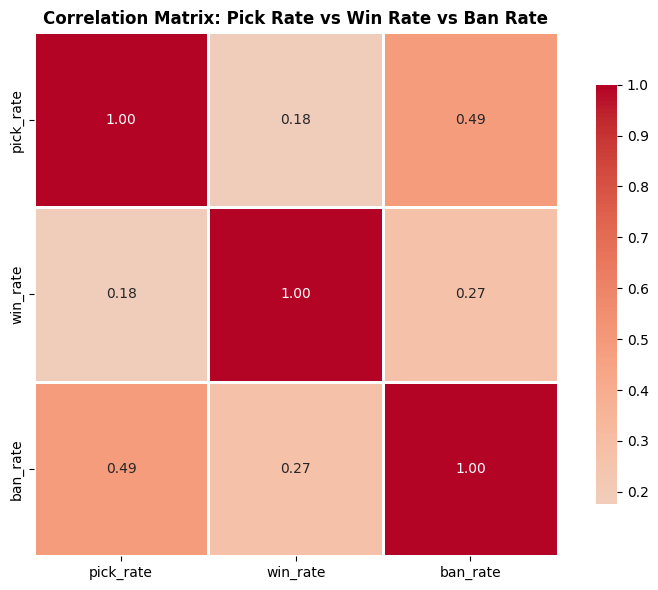


Deskripsi Correlation Matrix:
Matriks korelasi menunjukkan hubungan linear antar variabel:
1. Win Rate vs Ban Rate: 0.27
   Korelasi sedang: ada hubungan positif antara win rate dan ban rate.

2. Pick Rate vs Win Rate: 0.18
   Korelasi lemah: popularitas tidak selalu berkaitan dengan kemenangan.


In [ ]:
# Hitung matriks korelasi
correlation_matrix = df_clean[['pick_rate', 'win_rate', 'ban_rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 10})

plt.title('Correlation Matrix: Pick Rate vs Win Rate vs Ban Rate', 
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("Matriks korelasi menunjukkan hubungan linear antar variabel:")
print(f"1. Win Rate vs Ban Rate: {correlation_matrix.loc['win_rate', 'ban_rate']:.2f}")
if correlation_matrix.loc['win_rate', 'ban_rate'] > 0.5:
    print("   Korelasi kuat positif: hero dengan win rate tinggi cenderung sering di-ban.")
else:
    print("   Korelasi sedang: ada hubungan positif antara win rate dan ban rate.")
    
print(f"\n2. Pick Rate vs Win Rate: {correlation_matrix.loc['pick_rate', 'win_rate']:.2f}")
if correlation_matrix.loc['pick_rate', 'win_rate'] > 0.3:
    print("   Korelasi positif: hero yang sering dipilih cenderung memiliki win rate yang baik.")
else:
    print("   Korelasi lemah: popularitas tidak selalu berkaitan dengan kemenangan.")